### DEMO Artificial Intelligence project - K.Lewandowski and K.Kadłubowski

#### This demo presents how the designed app could work by clasifing input images of vegetables, given by the user

##### Import neccesary libraries

In [18]:
import torch
import os
import math
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#### Use cuda if it is avalaible, otherwise use cpu

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Define transformation applied to images in dataset:

- Resize the images to 128x128 pixels.
- Convert the images to PyTorch tensors.

In [ ]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

#### Set path with a few example images for clasification, set also names of the classes on which model was trained.

In [ ]:
data_dir = './demo_images'
class_names = ['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

#### Get a list of image files 

In [ ]:
image_files = [f for f in os.listdir(data_dir) if f.endswith('.jpg')]

#### Load the trained model and set it to evaluation mode.

In [ ]:
model = torch.jit.load('whole_model.pt').to(device)
model.eval()

#### Open image files, transform them and classify using the loaded model. Images and predicted labels are added to the lists for further visualization

In [27]:

images, labels = [], []
for image_file in image_files:
    # Load the image
    image_path = os.path.join(data_dir, image_file)
    image = Image.open(image_path)

    # Preprocess the image, unsqueeze adds extra dimension because model expects a batch size
    input_tensor = transform(image).unsqueeze(0).to(device)

    # Get prediction
    with torch.no_grad():
        outputs = model(input_tensor)
        # Get the index of the class with the highest probability
        _, predicted_class = outputs.max(1) 
    # Get the predicted label   
    predicted_label = class_names[predicted_class.item()]
    print(f'Predicted label of {image_file} : {predicted_label}')

    # Append results for visualization
    images.append(image)
    labels.append(predicted_label)


Predicted label of cucumber.jpg : Cucumber
Predicted label of pumpkin.jpg : Pumpkin
Predicted label of carrot.jpg : Carrot
Predicted label of bean.jpg : Bean
Predicted label of bitter_gourd.jpg : Bitter_Gourd
Predicted label of capsicum.jpg : Capsicum
Predicted label of cabbage.jpg : Cabbage
Predicted label of tomato.jpg : Tomato


#### For visualisation plot grid of images with the predicted labels.

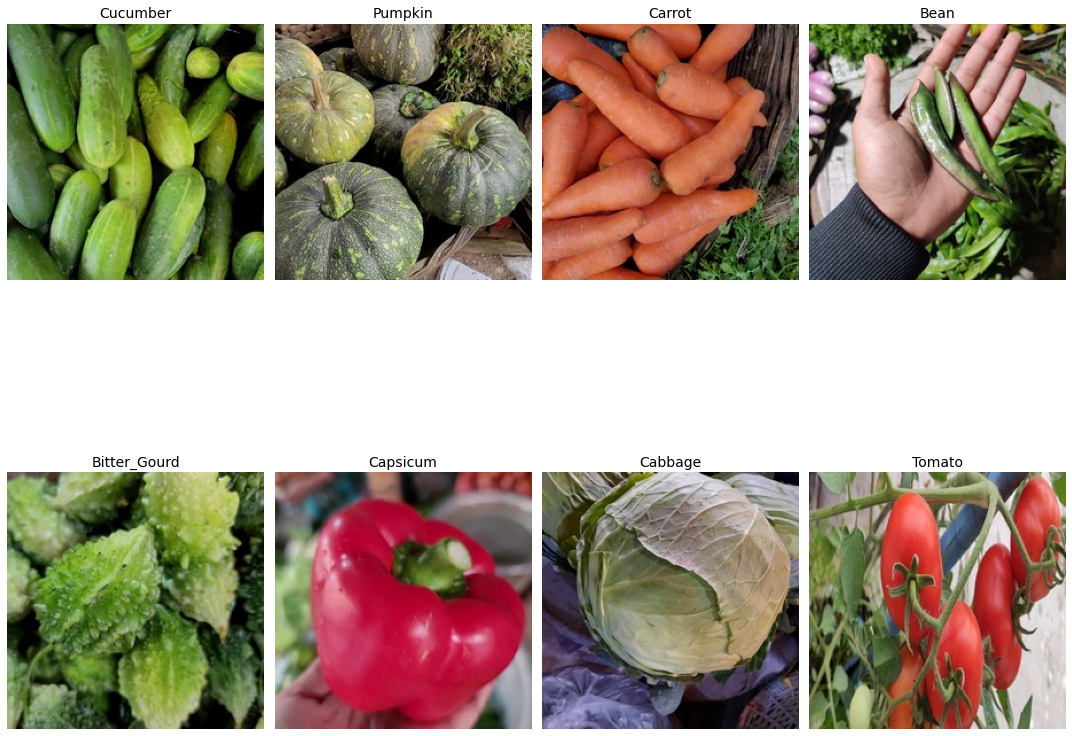

In [29]:
# Plot the images and labels in a grid
def plot_images_grid(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(15, 15), facecolor='white')
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        if i >= rows * cols:
            break
        axes[i].imshow(img)
        axes[i].set_title(label, fontsize=14)
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()


# Define grid size
grid_rows = 2
grid_cols = 4

# Plot grid of images with labels
plot_images_grid(images, labels, grid_rows, grid_cols)